In [2]:
import network

Using Theano backend.
Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5004)


In [14]:
from keras.utils.visualize_util import model_to_dot, plot
from IPython.display import SVG
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
# %matplotlib inline
plt.style.use("ggplot")
import random
import cPickle as pickle

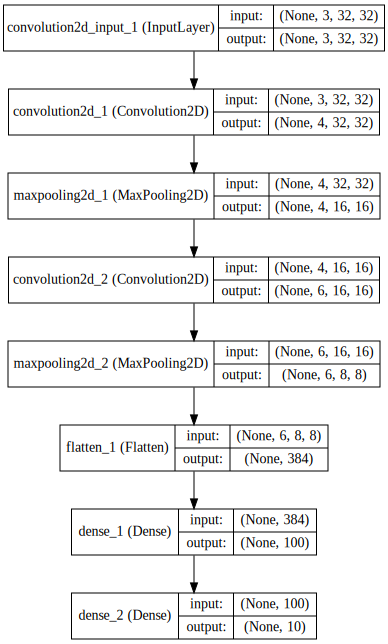

In [4]:
lenet = network.lenet()

# SVG(model_to_dot(lenet, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
from keras.datasets import cifar10

batch_size = 128
nb_epoch = 50

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
random.seed(1405)
lenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lehis = lenet.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s - loss: 1.6270 - acc: 0.4669 - val_loss: 1.6115 - val_acc: 0.4631
Epoch 2/100
50000/50000 [==============================] - 3s - loss: 1.5949 - acc: 0.4721 - val_loss: 1.6454 - val_acc: 0.4494
Epoch 3/100
50000/50000 [==============================] - 3s - loss: 1.6342 - acc: 0.4536 - val_loss: 1.5960 - val_acc: 0.4610
Epoch 4/100
50000/50000 [==============================] - 3s - loss: 1.6024 - acc: 0.4652 - val_loss: 1.5850 - val_acc: 0.4550
Epoch 5/100
50000/50000 [==============================] - 3s - loss: 1.6815 - acc: 0.4275 - val_loss: 1.6952 - val_acc: 0.4258
Epoch 6/100
50000/50000 [==============================] - 3s - loss: 1.6162 - acc: 0.4510 - val_loss: 1.6241 - val_acc: 0.4483
Epoch 7/100
50000/50000 [==============================] - 3s - loss: 1.6085 - acc: 0.4501 - val_loss: 1.6283 - val_acc: 0.4519


In [ ]:
with open('history_lenet.dump', 'w') as f:
    pickle.dump(lehis, f)